In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#from sklearn import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB


Import data

In [81]:
X_train = pd.read_csv("X_train.csv", index_col=0)
X_test = pd.read_csv("X_test.csv", index_col=0)

y_train = pd.read_csv("y_train.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

In [82]:
train_data = pd.concat([X_train, y_train], axis=1)

We define a function that returns all the desired metrics of a model to make comparisons. 

In [83]:
def plot_metrics(name, model, X, y):

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss']
    scores = dict()

    for score in scoring:
        scores[score] = cross_val_score(model, X, y.values.ravel(), cv=5, scoring=score)

    
    accuracy = np.mean(scores['accuracy'])
    precision = np.mean(scores['precision'])
    recall = np.mean(scores['recall'])
    f1 = np.mean(scores['f1'])
    roc_auc = np.mean(scores['roc_auc'])
    logloss = -np.mean(scores['neg_log_loss'])

    y_real = y.values.ravel()
    y_pred = model.predict(X)
    cm = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Dead', 'Alive'], yticklabels=['Dead', 'Alive'])
    plt.xlabel('Predicted outcome')
    plt.ylabel('True outcome')
    plt.title('Confusion Matrix')
    plt.show()
    
    metrics = pd.DataFrame({
    'Model' : [name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC-AUC': [roc_auc],
    'Log Loss': [logloss]
    })

    return metrics

In [84]:
X_train.describe()

,age,days_study,days_followup,simul_diseases,scoma,charges,avtisst,days_befstudy,ca,meanbp,wblc,hrt,resp,temp,crea,sod,adlsc
count,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000
mean,0.546555,0.228376,0.255584,0.220141,0.085930,0.165795,0.293632,0.086102,0.620155,0.495289,0.380220,0.487965,0.496452,0.551929,0.362896,0.493428,0.266989
std,0.178057,0.205954,0.282024,0.151390,0.216572,0.179652,0.187378,0.209192,0.859999,0.145389,0.192742,0.146735,0.197463,0.123259,0.185353,0.184752,0.282706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.436523,0.078947,0.016288,0.111111,0.000000,0.041815,0.154167,0.000000,0.000000,0.387283,0.241856,0.364583,0.425000,0.457875,0.218743,0.370370,0.000000
50%,0.566564,0.157895,0.151530,0.222222,0.000000,0.098103,0.241667,0.000000,0.000000,0.462428,0.353758,0.479167,0.525000,0.509971,0.312475,0.481481,0.142857
75%,0.674170,0.315789,0.401777,0.333333,0.000000,0.223214,0.391667,0.000000,2.000000,0.618497,0.487378,0.598958,0.625000,0.656491,0.437528,0.629630,0.428571
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
def confusion(true, pred):
    """
    Function for printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

We create the results dataframe to save all the metrics from the models that we obtain

In [86]:
models = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'Log Loss'])

#### LDA

In [87]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.values.ravel())

print('Explained Variance Ratio')
pd.DataFrame(lda.explained_variance_ratio_ )

Explained Variance Ratio


,0
0,1.0


We add to "models" the metrics obtained from LDA

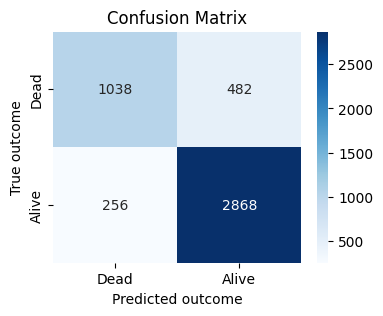

C:\Users\Anna\AppData\Local\Temp\ipykernel_28032\3956734434.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, plot_metrics("LDA", lda, X_train, y_train)])


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181


In [88]:
models = pd.concat([models, plot_metrics("LDA", lda, X_train, y_train)])
models.head()

#### QDA

c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear


Priors: [0.32730405 0.67269595]
Means:



c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear


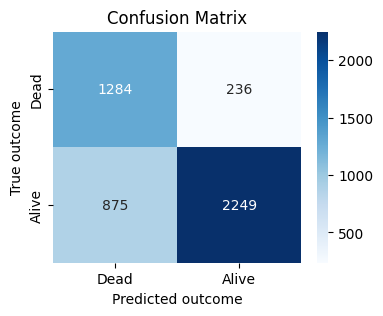

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773


In [89]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train, y_train.values.ravel())

print('Priors:', qda.priors_)
print('Means:\n')
means =pd.DataFrame(qda.means_)
means.columns=train_data.columns[1:]
means

models = pd.concat([models, plot_metrics("QDA", qda, X_train, y_train)])
models.head()

#### K-NN

In [90]:
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid={
        'n_neighbors': [1, 3, 5, 7, 10, 15, 20],
        'metric': ['cityblock', 'cosine', 'l1', 'l2', 'euclidean', 'minkowski', 'manhattan']
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False
)

knn_cv.fit(X_train, y_train.values.ravel())
results_cv = pd.DataFrame(knn_cv.cv_results_)

In [91]:
cols = ['param_n_neighbors', 'param_metric',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro', 
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_n_neighbors,param_metric,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
48,20,manhattan,0.808573,0.771321,0.791136,0.760094,0.013121,0.016546,0.016396,0.016755
6,20,cityblock,0.808573,0.771321,0.791136,0.760094,0.013121,0.016546,0.016396,0.016755
20,20,l1,0.808573,0.771321,0.791136,0.760094,0.013121,0.016546,0.016396,0.016755
11,10,cosine,0.803403,0.771279,0.779456,0.765203,0.008922,0.009270,0.011515,0.008113
46,10,manhattan,0.803404,0.771021,0.779842,0.764697,0.009932,0.009946,0.013222,0.008486
4,10,cityblock,0.803404,0.771021,0.779842,0.764697,0.009932,0.009946,0.013222,0.008486
18,10,l1,0.803404,0.771021,0.779842,0.764697,0.009932,0.009946,0.013222,0.008486
16,5,l1,0.803833,0.767028,0.783522,0.756910,0.007629,0.009530,0.009388,0.009695
2,5,cityblock,0.803833,0.767028,0.783522,0.756910,0.007629,0.009530,0.009388,0.009695
44,5,manhattan,0.803833,0.767028,0.783522,0.756910,0.007629,0.009530,0.009388,0.009695


We choose to use "manhattan" distance with 20 neigbors, as it is one of the configurations that get better results.  

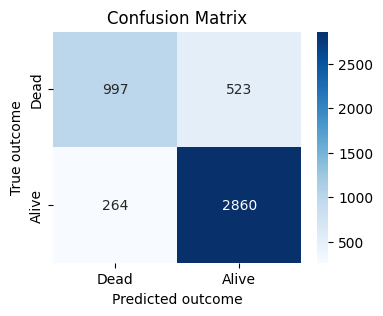

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365


In [92]:
knn = KNeighborsClassifier(n_neighbors=20, metric='manhattan')
knn.fit(X_train, y_train.values.ravel())

models = pd.concat([models, plot_metrics("K-NN", knn, X_train, y_train)])
models.head()

#### Gaussian Naive Bayes

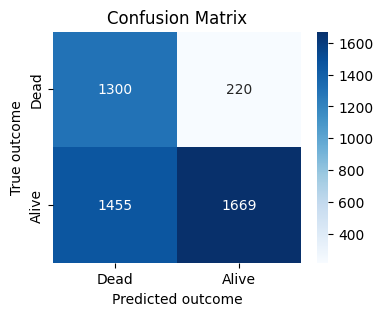

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365
0,Gaussian Naive Bayes,0.637814,0.882662,0.532335,0.664076,0.842532,1.871467


In [93]:
gaussian_nb = GaussianNB()

gaussian_nb.fit(X_train,y_train.values.ravel())

models = pd.concat([models, plot_metrics("Gaussian Naive Bayes", gaussian_nb, X_train, y_train)])
models.head()

#### Logistic Regression

In [94]:
logreg = LogisticRegressionCV(Cs=20, random_state=1, cv = 10, scoring = 'precision', penalty="l2")
logreg.fit(X_train, y_train.values.ravel())

avg_crossval_scores = logreg.scores_[1].mean(axis=0)
idx = np.argmax(avg_crossval_scores)
best_C = logreg.Cs_[idx]
print(best_C)

11.288378916846883


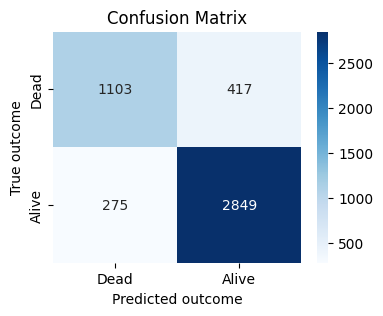

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365
0,Gaussian Naive Bayes,0.637814,0.882662,0.532335,0.664076,0.842532,1.871467
0,Logistic Regression,0.847114,0.868930,0.910368,0.889034,0.929308,0.331887


In [95]:
logreg = LogisticRegression(C=best_C, penalty="l2")
logreg.fit(X_train, y_train.values.ravel())

models = pd.concat([models, plot_metrics("Logistic Regression", logreg, X_train, y_train)])
models.head()

Good overall metrix but still lots of dead patiets forecasted as alive

#### SGDC

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 344, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2106, in _check_response_method
    raise AttributeError(
AttributeError: SGDClassifier has none of the following attributes: predict_proba.

  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for

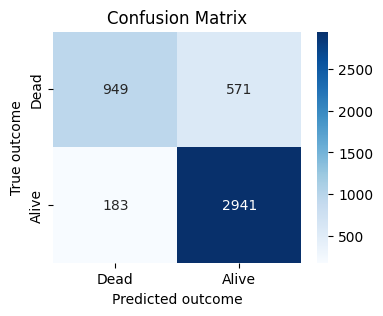

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365
0,Gaussian Naive Bayes,0.637814,0.882662,0.532335,0.664076,0.842532,1.871467
0,Logistic Regression,0.847114,0.868930,0.910368,0.889034,0.929308,0.331887


In [96]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train.values.ravel())

models = pd.concat([models, plot_metrics("SGDC", sgd, X_train, y_train)])
models.head()


#### Decision Tree

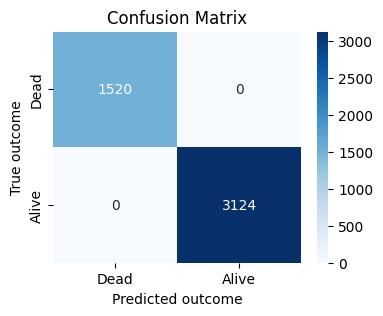

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Logistic Regression,0.847114,0.868930,0.910368,0.889034,0.929308,0.331887
0,Decision Tree,0.845392,0.883121,0.892764,0.886643,0.820556,5.758910
0,SGDC,0.840871,0.853737,0.922842,0.886435,0.924315,NaN
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365


In [97]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Decision Tree", model_tree, X_train, y_train)])
models.sort_values(by="F1 Score", ascending=False).head()

Perfect fit based on confusion matrix (uses all data) but worse metrics compared to Logistic Regression (using cross-validation), it's overfitting the data.

In [98]:
corr_matrix = train_data.corr(numeric_only=True)
corr_matrix["death"].sort_values()

days_followup                -0.689533
dzgroup_ARF/MOSF w/Sepsis    -0.188325
dzclass_ARF/MOSF             -0.123873
dzclass_COPD/CHF/Cirrhosis   -0.113522
dzgroup_COPD                 -0.080770
days_study                   -0.078112
dzgroup_CHF                  -0.059128
charges                      -0.058751
sex_female                   -0.046999
dementia_0                   -0.042431
race_black                   -0.038300
race_hispanic                -0.028602
diabetes_1                   -0.024114
meanbp                       -0.019667
wblc                         -0.017739
dzgroup_Cirrhosis            -0.017673
sod                          -0.017361
temp                         -0.013389
days_befstudy                -0.011244
hrt                          -0.006216
race_other                   -0.002821
race_asian                   -0.001087
resp                          0.009547
diabetes_0                    0.024114
crea                          0.038800
dementia_1               

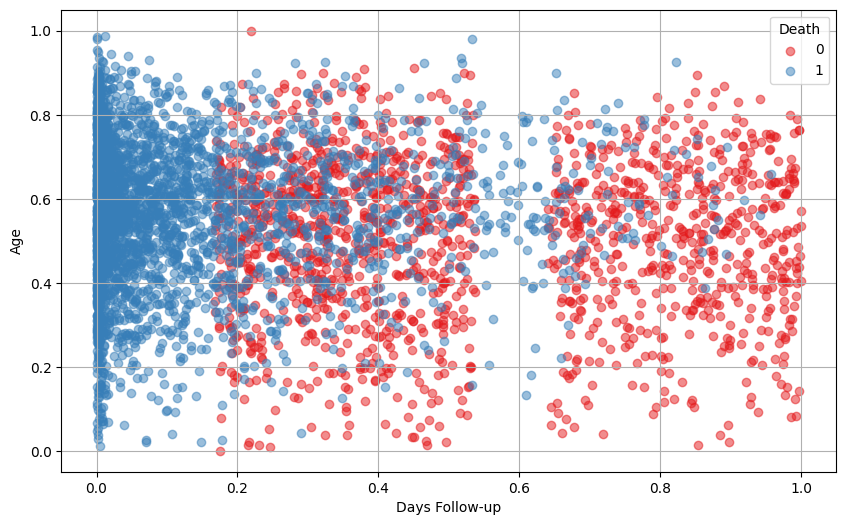

In [99]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Define color map
palette = sns.color_palette('Set1', n_colors=len(train_data['death'].unique()))

# Plot data points
for label, color in zip(train_data['death'].unique(), palette):
    plt.scatter(train_data.loc[train_data['death'] == label, 'days_followup'], 
                train_data.loc[train_data['death'] == label, 'age'], 
                color=color, label=label, alpha=0.5)

# Add labels and title
plt.xlabel('Days Follow-up')
plt.ylabel('Age')

# Add legend
plt.legend(title='Death')

# Show plot
plt.grid(True)
plt.show()


#### Random Forest

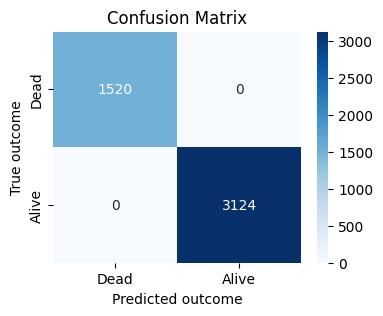

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365
0,Gaussian Naive Bayes,0.637814,0.882662,0.532335,0.664076,0.842532,1.871467
0,Logistic Regression,0.847114,0.868930,0.910368,0.889034,0.929308,0.331887
0,SGDC,0.840871,0.853737,0.922842,0.886435,0.924315,NaN
0,Decision Tree,0.845392,0.883121,0.892764,0.886643,0.820556,5.758910
0,Random Forest,0.874034,0.927900,0.880919,0.904304,0.947912,0.282970


In [100]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Random Forest", forest, X_train, y_train)])
models

#### Gradient Boosting

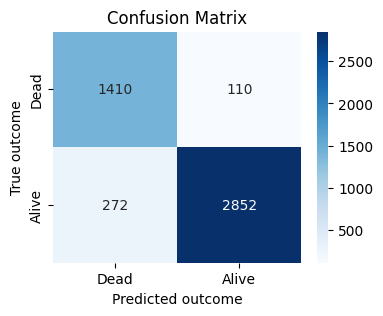

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,LDA,0.838286,0.854327,0.916133,0.884044,0.932521,0.349181
0,QDA,0.754313,0.900446,0.713522,0.795870,0.861147,0.514773
0,K-NN,0.808573,0.829724,0.900450,0.863540,0.868093,0.485365
0,Gaussian Naive Bayes,0.637814,0.882662,0.532335,0.664076,0.842532,1.871467
0,Logistic Regression,0.847114,0.868930,0.910368,0.889034,0.929308,0.331887
0,SGDC,0.840871,0.853737,0.922842,0.886435,0.924315,NaN
0,Decision Tree,0.845392,0.883121,0.892764,0.886643,0.820556,5.758910
0,Random Forest,0.874034,0.927900,0.880919,0.904304,0.947912,0.282970
0,Gradient Boosting,0.888030,0.942571,0.887964,0.914217,0.958903,0.232887


In [101]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Gradient Boosting", gbc, X_train, y_train)])
models

#### Ada Boosting

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

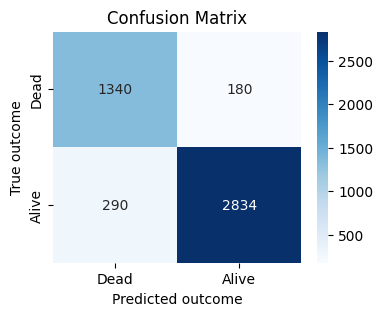

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Gradient Boosting,0.888030,0.942571,0.887964,0.914217,0.958903,0.232887
0,AdaBoost,0.875755,0.922412,0.890523,0.906013,0.950312,0.528756
0,Random Forest,0.874034,0.927900,0.880919,0.904304,0.947912,0.282970
0,Logistic Regression,0.847114,0.868930,0.910368,0.889034,0.929308,0.331887
0,Decision Tree,0.845392,0.883121,0.892764,0.886643,0.820556,5.758910


In [102]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("AdaBoost", adb, X_train, y_train)])
models.sort_values(by="F1 Score", ascending=False).head()

Once we have observed the performance of these first models. We try clustering fitting

#### Clustering

We choose which value of K give the best results

In [103]:
"""
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train)
    
    fits.append(model)
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

print(score)
"""

"\nK = range(2, 8)\nfits = []\nscore = []\n\nfor k in K:\n    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train)\n    \n    fits.append(model)\n    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))\n\nprint(score)\n"

## Tunning hyperparameters of the selected model: Gradient Boosting

As we have a imbalanced dataset we need to consider this fact treating the dataset.  

In [104]:
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in the training set:", dict(zip(unique, counts)))

Class distribution in the training set: {0: 1520, 1: 3124}


As we have a large number of rows we will randomly undersample the dataset

In [105]:
train_data_death = train_data[train_data.death == 1]
train_data_death = train_data_death.sample(1520)

train_data_balanced = pd.concat([train_data_death, train_data[train_data.death == 0]])
X_train_balanced = train_data_balanced.drop("death", axis=1)
y_train_balanced = train_data_balanced["death"]

unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Class distribution in the balanced training set:", dict(zip(unique, counts)))



Class distribution in the balanced training set: {0: 1520, 1: 1520}


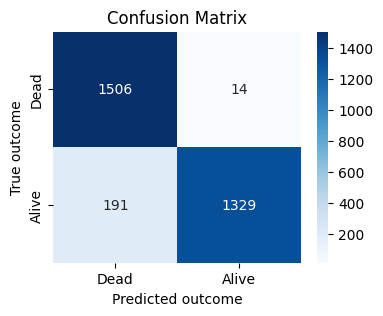

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Gradient Boosting,0.900987,0.964946,0.831579,0.89384,0.954491,0.24513


In [106]:
gbc_2 = GradientBoostingClassifier()
gbc_2.fit(X_train_balanced, y_train_balanced.values.ravel())
plot_metrics("Gradient Boosting", gbc_2, X_train_balanced, y_train_balanced)

We also try randomly oversampling the minority class. So to balance the classes we apply SMOTE 

In [107]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("Class distribution in the training set after SMOTE:", dict(zip(unique_resampled, counts_resampled)))

Class distribution in the training set after SMOTE: {0: 3124, 1: 3124}


And we train again the Gradient Boosting model

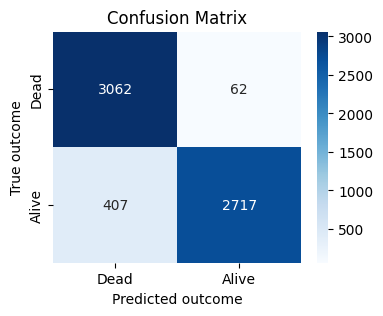

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Gradient Boosting,0.903015,0.959649,0.841878,0.896942,0.963713,0.225616


In [109]:
gbc_3 = GradientBoostingClassifier()
gbc_3.fit(X_train_resampled, y_train_resampled.values.ravel())
plot_metrics("Gradient Boosting", gbc_3, X_train_resampled, y_train_resampled)

We observe how this models perform on the test set

In [112]:

y_pred = gbc.predict(X_test)
y_pred_2 = gbc_2.predict(X_test)
y_pred_3 = gbc_3.predict(X_test)


print("\nConfusion matrix on test set:")
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_3))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred_3))




Confusion matrix on test set:
[[ 519   60]
 [ 114 1118]]
[[ 560   19]
 [ 162 1070]]
[[ 550   29]
 [ 153 1079]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       579
           1       0.95      0.91      0.93      1232

    accuracy                           0.90      1811
   macro avg       0.88      0.90      0.89      1811
weighted avg       0.91      0.90      0.90      1811

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       579
           1       0.98      0.87      0.92      1232

    accuracy                           0.90      1811
   macro avg       0.88      0.92      0.89      1811
weighted avg       0.92      0.90      0.90      1811

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       579
           1       0.97      0.88      0.92      1232

    accuracy                           0.90   

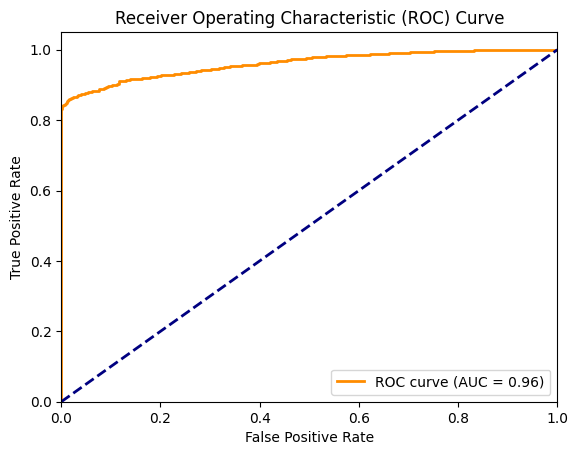

In [108]:
probs = gbc_2.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()